In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from elasticsearch import Elasticsearch

%matplotlib inline
sns.set(style='whitegrid')

In [2]:
es = Elasticsearch(['elastic:9200'])

res = es.search(index='games_test', body={
    "size": 100,
    "query": {"match_all": {}}
})
print("Got %d hits" % res['hits']['total'])

Got 107 hits


In [3]:
def language_data(response):
    languages = set()
    number= []
    lng = []
    data = {}
    for val in response['hits']['hits']:
        for lg in val['_source']['languages']:
            languages.add(lg)
            lng.append(lg)
    for lg in languages:
        number.append(lng.count(lg))
    data['languages'] = list(languages)
    data['count'] = number
    return pd.DataFrame.from_dict(data)

lng_data = language_data(res)
lng_data

,languages,count
0,Danish,15
1,Russian,70
2,German,85
3,Dutch,24
4,Bulgarian,5
5,Italian,69
6,Hungarian,16
7,Finnish,17
8,Arabic,3
9,Thai,15


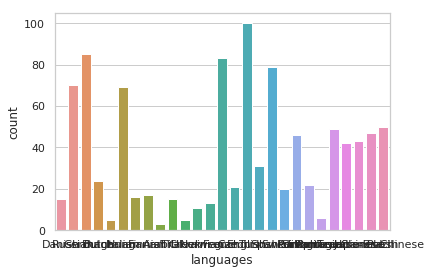

In [5]:
lng_graph = sns.barplot(x="languages", y="count", data=lng_data)